## Aggregations: min, max, and Everything in Between

For explore datasets we need apply some functions over it, as sum, mean, median, minimum or maximum, etc. Numpy offers some aggregation functions to do these operations in the arrays, and we will discuss about them.

### Summing the Values in an Array

For sum the values of array we can use the `np.sum()` function:

In [9]:
import numpy as np

arr = np.arange(1, 101)

print(np.sum(arr)) # 5050

5050


The same can be did with the python's `sum()` function, but it is more slow than numpy's function, because the latter is wrote in `C` code and the former is wrote in python code:

In [3]:
arr = np.arange(1, 1_000_000)

%timeit sum(arr)
%timeit np.sum(arr)

66.8 ms ± 422 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
423 μs ± 2.34 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


So, whenever possible use the `np.sum()` function.

### Minimum and Maximum

Numpy also provides aggregations functions to compute maximum and minimum of arrays, the functions `np.min()` and `np.max()`:

In [12]:
arr = np.arange(1, 55 + 1)

print(f"min(arr) = {np.min(arr)}") # 1
print(f"max(arr) = {np.max(arr)}") # 55

min(arr) = 1
max(arr) = 55


#### Multidimensional Aggregates

One common operation is apply an aggregate function in a single row or column of an array, and the functions above able do this with the `axis` argument:

In [17]:
mat = np.arange(12).reshape(3, 4)

print("mat:\n", mat, end = "\n\n")
print("min(mat) cols:\n", np.min(mat, axis = 0), end = "\n\n")
print("max(mat) rows:\n", np.max(mat, axis = 1), end = "\n\n")
print("sum(mat) rows:\n", np.sum(mat, axis = 1), end = "\n\n")

mat:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

min(mat) rows:
 [0 1 2 3]

max(mat) cols:
 [ 3  7 11]

sum(mat) cols:
 [ 6 22 38]



Here, the `axis` argument specifies the dimension of the array that will bt collapsed by the aggregate function.

#### Other Aggregation Functions

Numpy provides other aggregation functions, as seen in the list below:

| Function name | NaN-safe version | Description
| :- | :- | :- |
| np.sum | np.nansum | Compute sum of elements |
| np.prod | np.nanprod | Compute product of elements |
| np.mean | np.nanmean | Compute mean of elements |
| np.std | np.nanstd | Compute standard deviation |
| np.var | np.nanvar | Compute variance |
| np.min | np.nanmin | Find minimum value |
| np.max | np.nanmax | Find maximum value |
| np.argmin | np.nanargmin | Find index of minimum value |
| np.argmax | np.nanargmax | Find index of maximum value |
| np.median | np.nanmedian | Compute median of elements |
| np.percentile | np.nanpercentile | Compute rank-based statistics of elements |
| np.any | N/A | Evaluate whether any elements are true |
| np.all | N/A | Evaluate whether all elements are true |

### Example: What Is the Average Height of US Presidents?

In this example we will apply the knowledges to determine the average height of US presidents. First we load the data set with `pandas`:

In [20]:
import numpy as np
import pandas as pd

data = pd.read_csv("../data/president_heights.csv")
heights = np.array(data["height(cm)"])

print(data, end = "\n\n")
print(heights, end = "\n\n")

    order                    name  height(cm)
0       1       George Washington         189
1       2              John Adams         170
2       3        Thomas Jefferson         189
3       4           James Madison         163
4       5            James Monroe         183
5       6       John Quincy Adams         171
6       7          Andrew Jackson         185
7       8        Martin Van Buren         168
8       9  William Henry Harrison         173
9      10              John Tyler         183
10     11           James K. Polk         173
11     12          Zachary Taylor         173
12     13        Millard Fillmore         175
13     14         Franklin Pierce         178
14     15          James Buchanan         183
15     16         Abraham Lincoln         193
16     17          Andrew Johnson         178
17     18        Ulysses S. Grant         173
18     19     Rutherford B. Hayes         174
19     20       James A. Garfield         183
20     21       Chester A. Arthur 

So with the heights we can get some summary statistics:

In [22]:
print(f"Mean height:        {heights.mean()}")
print(f"Standard deviation: {heights.std()}")
print(f"Minimum height:     {heights.min()}")
print(f"Maximum height:     {heights.max()}")

Median height:      182.0
Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


And we can also compute quantiles:

In [23]:
print(f"25th percentile: {np.percentile(heights, 25)}")
print(f"Median:          {np.median(heights)}")
print(f"75th percentile: {np.percentile(heights, 75)}")

25th percentile: 174.25
Median:          182.0
75th percentile: 183.0


And for a more visual representation of this data, we can use `matplotlib` library:

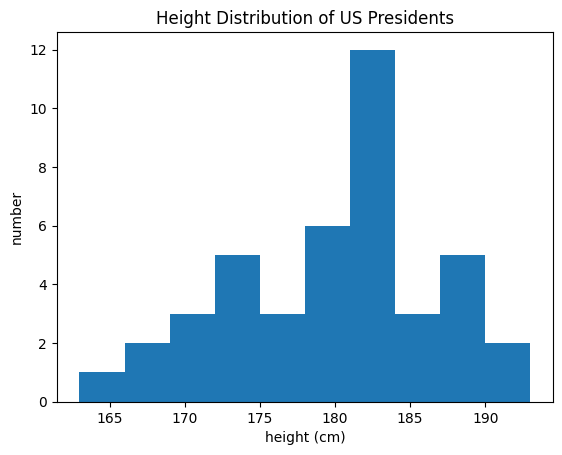

In [27]:
import matplotlib.pyplot as plt

plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')

plt.show()